<a href="https://colab.research.google.com/github/bintangkw/Data-Analytic-Ecommerce-Dataset/blob/main/assemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Library

In [427]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##2. Preprocessing

In [428]:
df = pd.read_excel('/content/drive/MyDrive/ANALITIK DATA 2/Tubes/Pakistan Largest Ecommerce Dataset (1).xlsx')
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,M-Y,FY,Customer ID,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
0,211131,complete,2016-01-07,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,2016-07-01,FY17,1,Ya,Shopee,Ya,"Penjual tidak merespons, Ulasan penjual/produk...",Sangat puas,setuju,sangat setuju
1,211133,canceled,2016-01-07,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,...,2016-07-01,FY17,2,Ya,Shopee,Ya,"Ulasan penjual/produk buruk, proses pengiriman...",Sangat Setuju,Setuju,Setuju
2,211134,canceled,2016-01-07,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,...,2016-07-01,FY17,3,Ya,Tokopedia,Ya,Perubahan kebutuhan atau keinginan,Setuju,Netral,Netral
3,211135,complete,2016-01-07,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,2016-07-01,FY17,4,Ya,Shopee,Ya,proses pengiriman yang lama,Sangat Setuju,Sangat Setuju,Setuju
4,211136,order_refunded,2016-01-07,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,...,2016-07-01,FY17,5,Ya,Tokopedia,Ya,Penjual tidak merespons,Sangat Setuju,Tidak setuju,Setuju


##3. Data Understanding

In [429]:
df.describe()

,item_id,created_at,price,qty_ordered,grand_total,increment_id,discount_amount,Working Date,MV,Year,Month,M-Y,Customer ID
count,349.000000,349,349.000000,349.000000,349.000000,3.490000e+02,349.000000,349,349.000000,349.0,349.0,349,349.000000
mean,211322.171920,2016-01-07 00:00:00,1971.284384,1.111748,2356.792980,1.001476e+08,7.163324,2016-01-07 00:00:00,2053.916905,2016.0,7.0,2016-07-01 00:00:00,47.355301
min,211131.000000,2016-01-07 00:00:00,1.000000,1.000000,0.000000,1.001474e+08,0.000000,2016-01-07 00:00:00,1.000000,2016.0,7.0,2016-07-01 00:00:00,1.000000
25%,211230.000000,2016-01-07 00:00:00,260.000000,1.000000,323.000000,1.001475e+08,0.000000,2016-01-07 00:00:00,288.000000,2016.0,7.0,2016-07-01 00:00:00,33.000000
50%,211322.000000,2016-01-07 00:00:00,360.000000,1.000000,366.000000,1.001476e+08,0.000000,2016-01-07 00:00:00,360.000000,2016.0,7.0,2016-07-01 00:00:00,43.000000
75%,211415.000000,2016-01-07 00:00:00,555.000000,1.000000,1099.000000,1.001476e+08,0.000000,2016-01-07 00:00:00,760.000000,2016.0,7.0,2016-07-01 00:00:00,59.000000
max,211510.000000,2016-01-07 00:00:00,96499.000000,6.000000,96499.000000,1.001477e+08,300.000000,2016-01-07 00:00:00,96499.000000,2016.0,7.0,2016-07-01 00:00:00,107.000000
std,108.891458,NaN,8863.822520,0.532404,9049.218907,7.909405e+01,36.127042,NaN,8935.456510,0.0,0.0,NaN,23.950376


In [430]:
df['status'].value_counts()

,count
status,
complete,230
canceled,50
order_refunded,49
received,13
refund,7


##4. Cleaning Data

In [431]:
df = df.drop(columns=['Working Date'])
df = df.drop(columns=['Customer ID'])
df = df.drop(columns=['created_at'])
df = df.drop(columns=['Customer Since'])
df = df.drop(columns=['M-Y'])
df = df.drop(columns=['item_id'])
df = df.drop(columns=['increment_id'])

In [432]:
df.isnull().sum()

,0
status,0
sku,0
price,0
qty_ordered,0
grand_total,0
category_name_1,0
sales_commission_code,0
discount_amount,0
payment_method,0
BI Status,1


In [433]:
df.dropna(inplace=True)

In [434]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)
    df[column] = label_encoder.fit_transform(df[column])
df

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,...,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
1,0,12,240.00,1,240.00,1,3,0.0,0,0,...,2016,7,0,0,1,0,9,0,2,2
2,0,5,2450.00,1,2450.00,6,3,0.0,0,0,...,2016,7,0,0,3,0,5,1,0,0
3,1,15,360.00,1,60.00,1,1,300.0,0,1,...,2016,7,0,0,1,0,10,0,1,2
4,2,4,555.00,2,1110.00,5,3,0.0,0,2,...,2016,7,0,0,3,0,2,0,3,2
5,0,9,80.00,1,80.00,5,3,0.0,0,0,...,2016,7,0,0,2,0,6,0,0,1
6,1,15,360.00,1,60.00,1,3,300.0,0,1,...,2016,7,0,0,0,0,2,0,2,1
7,1,10,170.00,1,170.00,5,3,0.0,0,1,...,2016,7,0,0,1,0,10,0,1,1
8,0,0,96499.00,1,96499.00,4,3,0.0,3,0,...,2016,7,0,0,3,0,1,0,1,1
9,0,0,96499.00,1,96499.00,4,3,0.0,2,0,...,2016,7,0,0,1,0,0,0,1,1
10,1,6,5500.00,1,5500.00,0,3,0.0,0,1,...,2016,7,0,0,3,0,0,0,1,1


In [435]:
df['status'] = df['status'].apply(lambda x: 1 if x in [1, 3] else 0)
df

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,...,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
1,0,12,240.00,1,240.00,1,3,0.0,0,0,...,2016,7,0,0,1,0,9,0,2,2
2,0,5,2450.00,1,2450.00,6,3,0.0,0,0,...,2016,7,0,0,3,0,5,1,0,0
3,1,15,360.00,1,60.00,1,1,300.0,0,1,...,2016,7,0,0,1,0,10,0,1,2
4,0,4,555.00,2,1110.00,5,3,0.0,0,2,...,2016,7,0,0,3,0,2,0,3,2
5,0,9,80.00,1,80.00,5,3,0.0,0,0,...,2016,7,0,0,2,0,6,0,0,1
6,1,15,360.00,1,60.00,1,3,300.0,0,1,...,2016,7,0,0,0,0,2,0,2,1
7,1,10,170.00,1,170.00,5,3,0.0,0,1,...,2016,7,0,0,1,0,10,0,1,1
8,0,0,96499.00,1,96499.00,4,3,0.0,3,0,...,2016,7,0,0,3,0,1,0,1,1
9,0,0,96499.00,1,96499.00,4,3,0.0,2,0,...,2016,7,0,0,1,0,0,0,1,1
10,1,6,5500.00,1,5500.00,0,3,0.0,0,1,...,2016,7,0,0,3,0,0,0,1,1


##5. Eksplorasi Data Analysis (EDA)

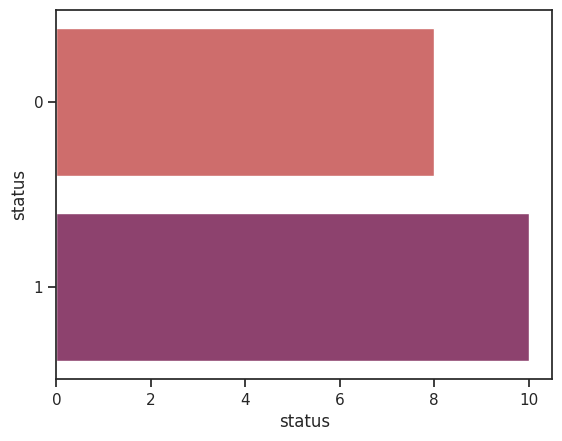

In [436]:
import warnings #menambahkan library warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='ticks') #mengatur tema visualisasi
sns.countplot(y='status', data=df, palette='flare')
plt.xlabel('status')
plt.show()

In [437]:
import sklearn.model_selection as ms
x = df[['sku','price','qty_ordered','grand_total','category_name_1','sales_commission_code','discount_amount','payment_method','BI Status',' MV ','Year','Month','FY',' Apakah Anda sering berbelanja di platform e-commerce?  ',' Platform e-commerce mana yang paling sering Anda gunakan?  ','Apakah Anda pernah membatalkan pesanan di e-commerce?',' Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu)  ','Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?  ',' Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?',' jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?  ']]
y = df['status']
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=30)

##6. Modeling (Regresi Logistik)

In [438]:
df.head()

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,...,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
1,0,12,240.0,1,240.0,1,3,0.0,0,0,...,2016,7,0,0,1,0,9,0,2,2
2,0,5,2450.0,1,2450.0,6,3,0.0,0,0,...,2016,7,0,0,3,0,5,1,0,0
3,1,15,360.0,1,60.0,1,1,300.0,0,1,...,2016,7,0,0,1,0,10,0,1,2
4,0,4,555.0,2,1110.0,5,3,0.0,0,2,...,2016,7,0,0,3,0,2,0,3,2
5,0,9,80.0,1,80.0,5,3,0.0,0,0,...,2016,7,0,0,2,0,6,0,0,1


In [439]:
import sklearn.linear_model as lm
model = lm.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [440]:
model.coef_

array([[ 8.59800749e-01, -2.77409456e-03, -7.20476617e-05,
         4.63345045e-03, -1.87625643e-01, -2.33153883e-01,
         2.08668122e-02,  1.24520594e-01,  4.94233974e-01,
        -1.03275184e-02, -3.24586627e-03, -1.12703690e-05,
         0.00000000e+00,  0.00000000e+00, -3.68422738e-01,
         0.00000000e+00,  2.09525468e-01, -9.16112743e-02,
         2.84399115e-01,  6.15831267e-02]])

In [441]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 0 0 0 0 0]


In [442]:
X_test.head()

,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
1,12,240.0,1,240.0,1,3,0.0,0,0,240,2016,7,0,0,1,0,9,0,2,2
11,2,210.0,1,366.0,5,3,0.0,0,2,210,2016,7,0,0,1,0,0,0,1,1
12,3,156.0,1,366.0,5,3,0.0,0,2,156,2016,7,0,0,3,0,10,0,1,1
15,1,1550.0,1,1550.0,3,0,0.0,3,0,1550,2016,7,0,0,2,0,8,0,1,1
10,6,5500.0,1,5500.0,0,3,0.0,0,1,5500,2016,7,0,0,3,0,0,0,1,1


In [443]:
y_test.head(1)

,status
1,0


In [444]:
import sklearn.metrics as met
cofusionmatrix = met.confusion_matrix(y_test, y_prediksi)
print(cofusionmatrix)

[[2 1]
 [3 0]]


In [445]:
score = model.score(X_test, y_test)
print(score)

0.3333333333333333


In [446]:
precesion = met.precision_score(y_test, y_prediksi)
print(precesion)

0.0


In [447]:
auc = met.roc_auc_score(y_test, model.predict(X_test))
print(auc)

0.33333333333333337


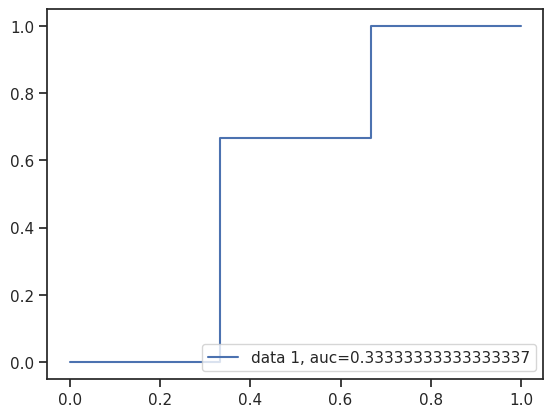

In [448]:
import matplotlib.pyplot as plt
y_pred_prob = model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_prob)
plt.plot(fp, tp, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [449]:
testing1 = pd.DataFrame({
    'price': [500],
    'grand_total': [370],
    'category_name_1': [7],
    'payment_method': [1],
    'BI Status' : [0],
    'sku' : [131],
    ' MV ' : [300],
    'qty_ordered': [0],
    'sales_commission_code': [0],
    'discount_amount': [0],
    'Year': [0],
    'Month': [0],
    'FY': [0],
    ' Apakah Anda sering berbelanja di platform e-commerce?  ' : [0],
    ' Platform e-commerce mana yang paling sering Anda gunakan?  ' : [0],
    'Apakah Anda pernah membatalkan pesanan di e-commerce?' : [1],
    ' Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu)  ' : [5],
    'Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?  ' : [0],
    ' Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?' : [1],
    ' jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?  ': [2]
})

testing1 = pd.DataFrame(testing1)
testing1

,price,grand_total,category_name_1,payment_method,BI Status,sku,MV,qty_ordered,sales_commission_code,discount_amount,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
0,500,370,7,1,0,131,300,0,0,0,0,0,0,0,0,1,5,0,1,2


In [450]:
testing1 = testing1[df[['sku','price','qty_ordered','grand_total','category_name_1','sales_commission_code','discount_amount','payment_method','BI Status',' MV ','Year','Month','FY',' Apakah Anda sering berbelanja di platform e-commerce?  ',' Platform e-commerce mana yang paling sering Anda gunakan?  ','Apakah Anda pernah membatalkan pesanan di e-commerce?',' Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu)  ','Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?  ',' Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?',' jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?  ']].columns]
pred_coba = model.predict(testing1)
print('Metode Pengiriman yang akan gunakan : ')
print(pred_coba)

Metode Pengiriman yang akan gunakan : 
[1]


In [451]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [452]:
print("Regresi Logistik:")
print(classification_report(y_test, y_prediksi))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Regresi Logistik:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.00      0.00      0.00         3

    accuracy                           0.33         6
   macro avg       0.20      0.33      0.25         6
weighted avg       0.20      0.33      0.25         6

AUC-ROC: 0.5555555555555556


In [453]:
accuracy = accuracy_score(y_test, y_prediksi)
print(f"Akurasi : {accuracy:.2f}")
precision = precision_score(y_test, y_prediksi)
print(f"Presisi : {precision:.2f}")
recall = recall_score(y_test, y_prediksi)
print(f"Recall  : {recall:.2f}")
f1 = f1_score(y_test, y_prediksi)
print(f"F1-Score: {f1:.2f}")
auc = met.roc_auc_score(y_test, y_prediksi)
print(f"AUC-ROC : {auc:.2f}")

Akurasi : 0.33
Presisi : 0.00
Recall  : 0.00
F1-Score: 0.00
AUC-ROC : 0.33


##7.Modeling Dc

In [454]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [455]:
accuracy_gini = clf_gini.score(X_test, y_test)
print(f'Akurasi model gini: {accuracy_gini}')

accuracy_entropy = clf_entropy.score(X_test, y_test)
print(f'Akurasi model entropy: {accuracy_entropy}')

Akurasi model gini: 0.16666666666666666
Akurasi model entropy: 0.16666666666666666


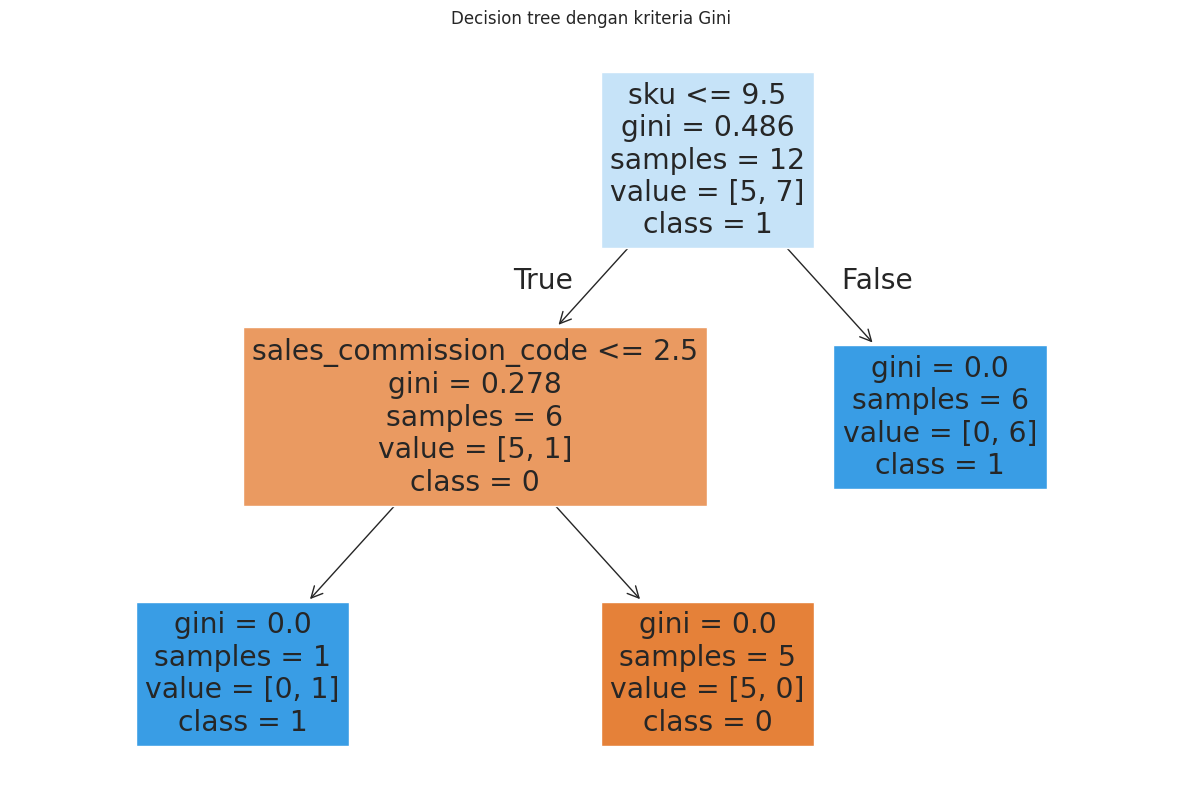

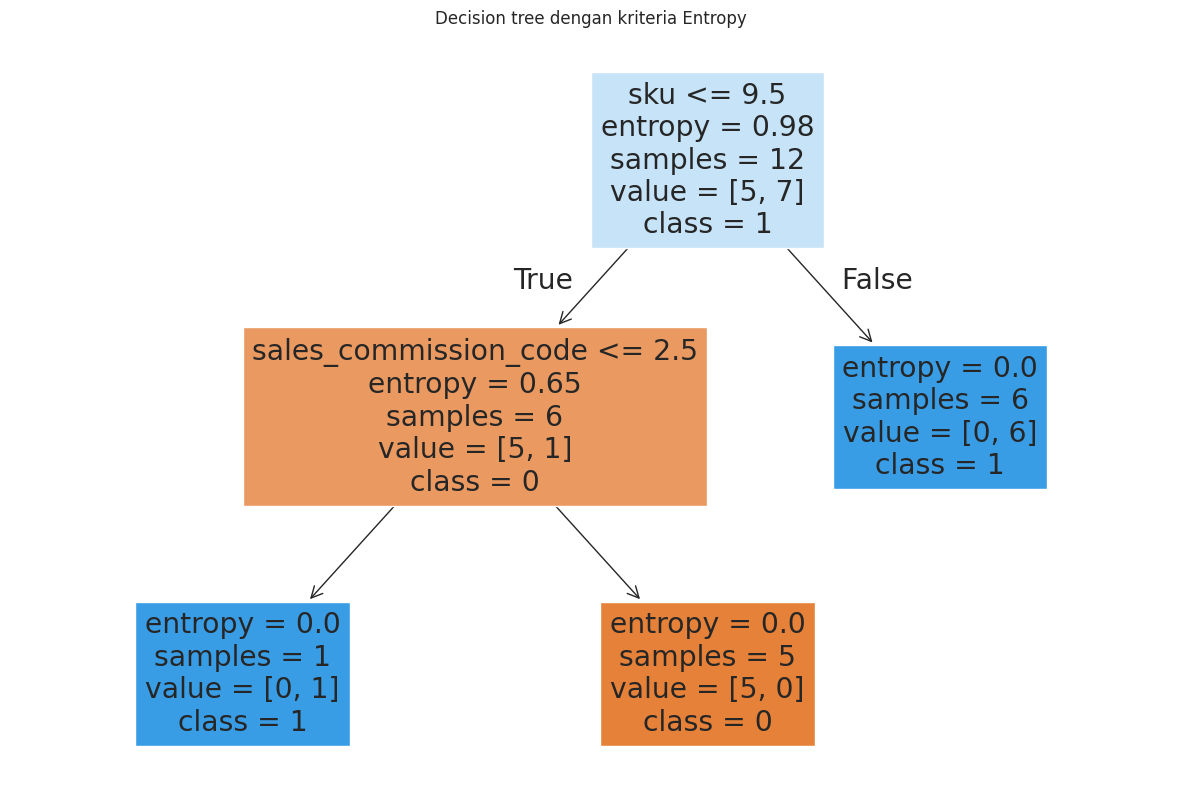

In [456]:
label_encoder.fit(y)
class_names = [str(c) for c in label_encoder.classes_]
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, filled=True, feature_names=x.columns, class_names=class_names)
plt.title('Decision tree dengan kriteria Gini')
plt.show()
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, filled=True, feature_names=x.columns, class_names=class_names)
plt.title('Decision tree dengan kriteria Entropy')
plt.show()

In [457]:
testing1 = pd.DataFrame({
    'price': [500],
    'grand_total': [370],
    'category_name_1': [7],
    'payment_method': [1],
    'BI Status' : [0],
    'sku' : [131],
    ' MV ' : [300],
    'qty_ordered': [0],
    'sales_commission_code': [0],
    'discount_amount': [0],
    'Year': [0],
    'Month': [0],
    'FY': [0],
    ' Apakah Anda sering berbelanja di platform e-commerce?  ' : [0],
    ' Platform e-commerce mana yang paling sering Anda gunakan?  ' : [0],
    'Apakah Anda pernah membatalkan pesanan di e-commerce?' : [1],
    ' Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu)  ' : [5],
    'Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?  ' : [0],
    ' Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?' : [1],
    ' jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?  ': [2]
})

testing1 = pd.DataFrame(testing1)
testing1

,price,grand_total,category_name_1,payment_method,BI Status,sku,MV,qty_ordered,sales_commission_code,discount_amount,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
0,500,370,7,1,0,131,300,0,0,0,0,0,0,0,0,1,5,0,1,2


In [458]:
y_pred_gini = clf_gini.predict(testing1[X_train.columns])
y_pred_entropy = clf_entropy.predict(testing1[X_train.columns])

print(f'Prediksi Model Gini: {y_pred_gini}')
print(f'Prediksi Model Entropy: {y_pred_entropy}')

preidctted_class_gini = label_encoder.inverse_transform(y_pred_gini)
preidctted_class_entropy = label_encoder.inverse_transform(y_pred_entropy)
print(f'Prediksi Kelas Gini : {preidctted_class_gini}')
print(f'Prediksi Kelas Entropy : {preidctted_class_entropy}')

Prediksi Model Gini: [1]
Prediksi Model Entropy: [1]
Prediksi Kelas Gini : [1]
Prediksi Kelas Entropy : [1]


In [459]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [460]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [461]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 0 0 1 0 0]


In [462]:
print("Decision Tree:")
print(classification_report(y_test, y_prediksi))
# Get the probabilities for the positive class (class 1)
y_prob_dt = model.predict_proba(X_test)[:, 1]
# Calculate the AUC-ROC score for the binary classification problem
print("AUC-ROC:", roc_auc_score(y_test, y_prob_dt))

Decision Tree:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.00      0.00      0.00         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6

AUC-ROC: 0.16666666666666669


##8. Modeling ANN

In [463]:
original = label_encoder.classes_
mapping = dict(zip(label_encoder.transform(original), original))
sorted_mapping = dict(sorted(mapping.items()))
print("\nMapping dari label numerik ke nama (yang sudah diurutkan):")
for key, value in sorted_mapping.items():
    print(f"{key}: {value}")


Mapping dari label numerik ke nama (yang sudah diurutkan):
0: 0
1: 1


In [464]:
!pip install tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [465]:
model = Sequential([
    # dense layer 1
    Dense(256, input_dim=20, activation='sigmoid'),

    # dense layer 2
    Dense(128, activation='sigmoid'),

    # output layer
    Dense(5, activation='softmax')
    ])

In [466]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [467]:
history = model.fit(X_train, y_train,
          epochs=50,
          batch_size=64,
          validation_split=0.2)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 2.1586 - val_accuracy: 0.0000e+00 - val_loss: 1.7941
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step - accuracy: 0.0000e+00 - loss: 1.7977 - val_accuracy: 0.3333 - val_loss: 1.4835
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - accuracy: 0.0000e+00 - loss: 1.4922 - val_accuracy: 0.6667 - val_loss: 1.2231
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step - accuracy: 0.8889 - loss: 1.2388 - val_accuracy: 0.6667 - val_loss: 1.0202
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.7778 - loss: 1.0395 - val_accuracy: 0.6667 - val_loss: 0.8682
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.7778 - loss: 0.8908 - val_accuracy: 0.6667 - val_loss: 0.7570
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.7778 - loss: 0.7826 - val_accuracy: 0.6667 - val_loss: 0.6759
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7778 - loss: 0.7050 - val_accuracy: 0.666

In [468]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
epochs = list(range(1, len(history.history['accuracy']) + 1))
fig = make_subplots(rows=1, cols=2, subplot_titles=["Akurasi", "Loss"])

# Akurasi
fig.add_trace(go.Scatter(y=history.history['accuracy'], x=epochs, name='Train', line_color='blue'), row=1, col=1)
fig.add_trace(go.Scatter(y=history.history['val_accuracy'], x=epochs, name='Val', line_color='orange'), row=1, col=1)

# Loss
fig.add_trace(go.Scatter(y=history.history['loss'], x=epochs, name='Train', line_color='green'), row=1, col=2)
fig.add_trace(go.Scatter(y=history.history['val_loss'], x=epochs, name='Val', line_color='red'), row=1, col=2)

# Layout
fig.update_layout(title="Performa Model per Epoch", width=900, height=400)
fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_yaxes(title_text="Akurasi", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.show()

In [469]:
# Mengevaluasi performa model pada data uji
results = model.evaluate(X_test, y_test, verbose=0)
print('test loss, test acc:', results)

test loss, test acc: [1.0818616151809692, 0.6666666865348816]


In [470]:
df

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,...,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
1,0,12,240.00,1,240.00,1,3,0.0,0,0,...,2016,7,0,0,1,0,9,0,2,2
2,0,5,2450.00,1,2450.00,6,3,0.0,0,0,...,2016,7,0,0,3,0,5,1,0,0
3,1,15,360.00,1,60.00,1,1,300.0,0,1,...,2016,7,0,0,1,0,10,0,1,2
4,0,4,555.00,2,1110.00,5,3,0.0,0,2,...,2016,7,0,0,3,0,2,0,3,2
5,0,9,80.00,1,80.00,5,3,0.0,0,0,...,2016,7,0,0,2,0,6,0,0,1
6,1,15,360.00,1,60.00,1,3,300.0,0,1,...,2016,7,0,0,0,0,2,0,2,1
7,1,10,170.00,1,170.00,5,3,0.0,0,1,...,2016,7,0,0,1,0,10,0,1,1
8,0,0,96499.00,1,96499.00,4,3,0.0,3,0,...,2016,7,0,0,3,0,1,0,1,1
9,0,0,96499.00,1,96499.00,4,3,0.0,2,0,...,2016,7,0,0,1,0,0,0,1,1
10,1,6,5500.00,1,5500.00,0,3,0.0,0,1,...,2016,7,0,0,3,0,0,0,1,1


In [471]:
new_data = pd.DataFrame({
    'sku' : [131],
    'price': [500],
    'qty_ordered': [2],
    'grand_total': [370],
    'category_name_1': [7],
    'sales_commission_code': [0],
    'discount_amount': [58],
    'payment_method': [1],
    'BI Status' : [0],
    ' MV ' : [300],
    'Year': [2016],
    'Month': [7],
    'FY': [0],
    ' Apakah Anda sering berbelanja di platform e-commerce?  ' : [0],
    ' Platform e-commerce mana yang paling sering Anda gunakan?  ' : [0],
    'Apakah Anda pernah membatalkan pesanan di e-commerce?' : [1],
    ' Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu)  ' : [5],
    'Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?  ' : [0],
    ' Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?' : [1],
    ' jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?  ': [2]
})
# Melakukan prediksi
predictions = model.predict(new_data)

# Menampilkan hasil prediksi (probabilitas tiap kelas)
print("Probabilitas untuk setiap potensi pembatalan:", predictions)

# Menentukan kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions)
print("potensi pembatalan yang diprediksi:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Probabilitas untuk setiap potensi pembatalan: [[0.22386925 0.770209   0.00187221 0.00305206 0.00099746]]
potensi pembatalan yang diprediksi: 1


In [472]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [473]:
y_prob_ann = model.predict(X_test)
y_pred_ann = np.argmax(y_prob_ann, axis=1)
print("ANN:")
print(classification_report(y_test, y_pred_ann))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
ANN:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



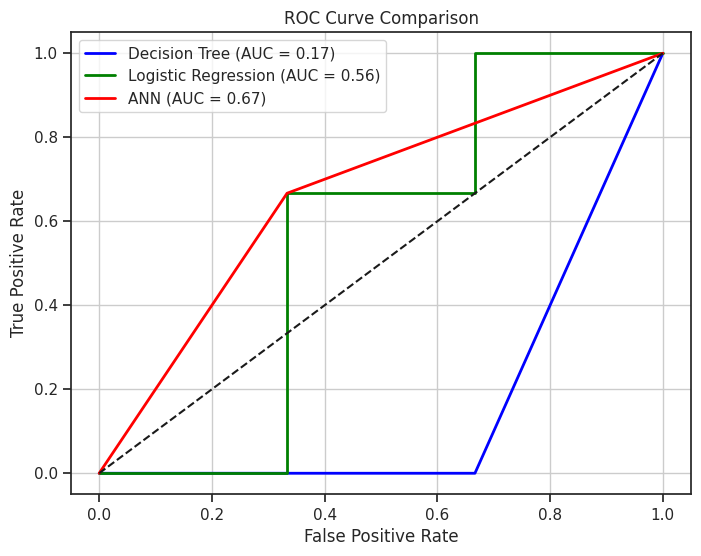

In [479]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_ann)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_dt)))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot(fpr_ann, tpr_ann, color='red', lw=2, label='ANN (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_ann)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()